# Preprocessing
- 웹에서 원하는 데이터를 가져오면 텍스트 데이터를 처리해야 사용할 수 있다.
- 텍스트 데이터의 전처리는 중요하다
- 원하는 feature로 만들어낸다.
- 텍스트마이닝 NLP기반
- 정산언어학
- 영상, 사진 -> 텍스트 -> 처리
- 문맥간의 연결 정보를 잘 못 찾기 때문에 챗봇은 어렵다.
- 자연어 분석 이전의 Preprocesing

자연어 분석
- 형태소 분석(가장 기본)
    - 순차적인 5단계
    - 토큰 분리 -> 어간 추출 -> 품사 부착 -> 색인 -> 벡터화
    - stem:어간
    - stemming(어간 추출) : 공통된 sequence를 추출
    - lemmatization(어근 추출) : 단어의 원형을 추출
- 구문 분석
    - 벡터표현이 만들어졌기 때문에 얼마나 유사성을 띄는지 연관이 있는지 계산하고 테스트할 수 있다. PMI등으로..
    - 글의 생김새 분석이 끝난다. 이 이후에는 의미를 알고 싶다.
- 의미 분석(잘 안된다)
    - 시멘틱 웹에서 가장 기본적인 예제는 apple이다. 사과 vs 회사
    - 문법적으로 봤을 때는 문제가 없지만 의미적으로 이상한 문장이 나올 수 있다.
    - 사전 구축, 사전 기반 예) 워드넷 상위어, 하위어, 반의어, 유의어 관계를 트리로 기술
    - 온톨로지 
    - 워드 임베딩 : 단어와 단어 상의 구분만 하면 된다.
- 담화 분석(잘 안된다)
    - 담론 분석 : 담화분석과는 좀 다르다. 잘 안되고 있는 분야. 그러므로 해야되는 분야
- 중의성 해소


담화
- 담화의 단위 문단, 문장.
- 새로운 이야기로 넘어갈 때 문단을 나눈다. (엔터를 친다.)
- 앞의 것의 원인, 반론으로 연관된 내용으로 나뉘어진다.
- NLP에서 포커스(말뭉치)라고 부른다

문장
- 완결된 내용을 나타내는 최소 단위 
- 마침표가 찍힌다.
- 절의 형태로 두 문장을 엮을 수 있다.
- 구나 절로 구성되어있다.
    - 절은 서로 다른 문장으로 쪼갤 수 있다.
- 내용이 많아지면 담화가 되고 최소한으로 작아지면 문장이 되므로 담화, 문단, 문장은 같다고 볼 수 있다.
- 문장을 구별하는게 가장 기본이다.
- 마침표가 없는 문장도 존재한다. ?사용하면 의문형 문장이 된다.
- 접속사가 나오면 서로 다른 문장을 연결해준 것이므로 분리해서 분석해야한다.
- 센텐스 토크나이징(sent_tokenize)

어절
- 띄어쓰기 단위로 구성되어 있는 애들.(단어 아님)
- 영어는 한 어절이 단어가 되는 경우가 대부분.
- 한글은 한 어절이 단어가 되지 않는다. -> 더 쪼개져야 한다.
- ex) 개미 한 마리가 방바닥을 -> 개미, 한, 마리가, 방바닥을

단어
- 어절을 구성하는 요소
- stemming한 결과
- ex) 개미 한 마리가 방바닥을 -> 개미, 한, 마리, 가, 방바닥, 을

형태소 
- 의미를 가진 문법의 최소 단위
- ex) 개미 한 마리가 방바닥을 -> 개미, 한, 마리, 가, 방, 바닥, 을
- 자립성에 따라
    - 자립 형태소
    - 의존 형태소
- 의미에 따라
    - 실질 형태소
    - 형식 형태소
    
KoNLPy, NLTK

NLTk
- natural language toolkit (한국어 지원 안함)
- 영어를 기반으로 한다.

In [ ]:
!pip install nltk

## Tokenizing
- sent_tokenize() 문장 단위로 토크나이즈한다.

In [2]:
import nltk

구두점(.) 다운로드

In [3]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\재은\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import sqlite3
con = sqlite3.connect("news.db")
cur = con.cursor()

In [5]:
cur.execute("""
    SELECT content
    FROM table2
    ORDER BY id ASC
""")
#corpus는 db에 저장 되어있는 기사들이 저장 되어 있는 리스트
# fetchall()하면 리스트 안에 튜플 형식으로 들어있으므로 하나씩 꺼내서 리스트에 담아준다.
news = cur.fetchall()
print(type(news))
print(type(news[0]))
corpus = [_[0] for _ in news]

<class 'list'>
<class 'tuple'>


(스펠, 어절, 문장(개행단위))

In [7]:
len(corpus[0]), len(corpus[0].split()), len(corpus[0].splitlines())

(1968, 443, 47)

실제 문장의 수

In [8]:
from nltk.tokenize import sent_tokenize
len(sent_tokenize(corpus[0]))

20

개행을 단위로 끊으면 내용이 끊겨서 알기 쉽지 않다.

In [9]:
corpus[0].splitlines()[0]

'"합리적 보수 주춧돌 되길 바랐는데" 줄지어 추모'

완전한 문장을 가져오기 때문에 문장의 구성성분과 그에 맞는 품사, 형태소, 어간,어근이 숨어있으므로 찾아서 분석한다.

In [10]:
sent_tokenize(corpus[0])[0]

'"합리적 보수 주춧돌 되길 바랐는데" 줄지어 추모\n\n정두언 빈소 찾은 조문객들(서울=연합뉴스) 신준희 기자 = 17일 서울 서대문구 세브란스병원 장례식장에 마련된 고 정두언 전 새누리당 의원의 빈소에서 조문객들이 조문하고 있다.'

일본의 형태소 분석기 - MeCab 단점 - 리눅스에서만 가능

구두점은 다음과 같은 것들이 있다. 이것들을 가지고 자른다.

In [11]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [239]:
sent_tokenize("""
    Life is too short, Life is too short... Life is too short!!
    Life is too short Life is too short. Life is too short?
""")

['\n    Life is too short, Life is too short... Life is too short!!',
 'Life is too short Life is too short.',
 'Life is too short?']

In [240]:
sent_tokenize("""
    수업하기 싫다.... 수업하기 "싫다".
""")

['\n    수업하기 싫다.... 수업하기 "싫다".']

구어체를 사용할 때에는 문장을 구별하기 쉽지 않을 것이다. 제대로 문장을 구현하지 않기 때문에.
- 다른식으로 구별해야한다.

In [241]:
sent_tokenize("""
    술 한잔 마셨습1니다... 영화가 잘 안되도 좋습니다. 하지만 엄복동 하나만
    기억해 주세요 진심을 다해 전합니다. 영화가 별로 일수있습니다
    밤낮으로 고민하고 연기 했습니다 ...최선을 다했고 열심히 했습니다
    저의 진심이 느껴지길 바랍니다 고맙습니다....
""")

['\n    술 한잔 마셨습1니다... 영화가 잘 안되도 좋습니다.',
 '하지만 엄복동 하나만\n    기억해 주세요 진심을 다해 전합니다.',
 '영화가 별로 일수있습니다\n    밤낮으로 고민하고 연기 했습니다 ...최선을 다했고 열심히 했습니다\n    저의 진심이 느껴지길 바랍니다 고맙습니다....']

In [242]:
sent_tokenize("""
    술 한잔 마셨습니다... 영화가 잘 안되도 좋습니다. 하지만 엄복동 하나만
    기억해 주세요 진심을 다해 전합니다. 영화가 별로 일 수 있습니다.
    밤낮으로 고민하고 연기 했습니다 ...최선을 다했고 열심히 했습니다.
    저의 진심이 느껴지길 바랍니다. 고맙습니다....
""")

['\n    술 한잔 마셨습니다... 영화가 잘 안되도 좋습니다.',
 '하지만 엄복동 하나만\n    기억해 주세요 진심을 다해 전합니다.',
 '영화가 별로 일 수 있습니다.',
 '밤낮으로 고민하고 연기 했습니다 ...최선을 다했고 열심히 했습니다.',
 '저의 진심이 느껴지길 바랍니다.',
 '고맙습니다....']

어절 단위로 분해
- split()으로 자르고 구두점으로 자른다.
- 어절을 자를 때 split()보다 word_tokenize가 좋다

In [8]:
from nltk.tokenize import word_tokenize
word_tokenize("Life is too short, Life is too short")

['Life', 'is', 'too', 'short', ',', 'Life', 'is', 'too', 'short']

' 와 " 는 다르게 조각낸다.

In [13]:
word_tokenize("""
    술 한잔 마셨습니다... 영화가 잘 안되도 좋습니다. 하지만 '엄복동' 하나만
    "기억"해 주세요 진심을 다해 전합니다. 영화가 별로 일 수 있습니다.
    '밤'낮으로 고민하고 연기 했습니다 ...최선을 다했고 열심히 했습니다.
    저의 진심이 느껴지길 바랍니다. 고맙습니다....
""")

['술',
 '한잔',
 '마셨습니다',
 '...',
 '영화가',
 '잘',
 '안되도',
 '좋습니다',
 '.',
 '하지만',
 "'엄복동",
 "'",
 '하나만',
 '``',
 '기억',
 "''",
 '해',
 '주세요',
 '진심을',
 '다해',
 '전합니다',
 '.',
 '영화가',
 '별로',
 '일',
 '수',
 '있습니다',
 '.',
 "'",
 "밤'낮으로",
 '고민하고',
 '연기',
 '했습니다',
 '...',
 '최선을',
 '다했고',
 '열심히',
 '했습니다',
 '.',
 '저의',
 '진심이',
 '느껴지길',
 '바랍니다',
 '.',
 '고맙습니다',
 '...',
 '.']

음절
- 소리가 나는 하나의 단위

음소
- 음절을 이루는 구성 요소?

음소 > 음절 > 형태소 > 단어 > 어절 > 문장 > 문단 

토큰, 청크

한글과 영어는 다른 단위를 사용한다.

In [14]:
len(corpus[0]), len(corpus[0].split()), len(corpus[0].splitlines())

(1968, 443, 47)

찾아낸 단어의 수는 늘었고 문장의수는 줄었다.
- 형태소 단위로 쪼개면 수가 더 늘어난다.

In [15]:
len(word_tokenize(corpus[0])), len(sent_tokenize(corpus[0]))

(555, 20)

In [ ]:
from konlpy.tag import Kkma
# 형태소 분석 -> 1113개로 늘어난다.
len(Kkma().morphs(corpus[0])), len(word_tokenize(corpus[0])), len(sent_tokenize(corpus[0]))

In [16]:
# 외국에서 특수기호를 사용한 이모티콘을 많이 사용하므로 감정분석을 위해 사용
# 그냥 word_tokenize하면 다 분해해 버리므로 감정을 분석할 수 없다.
from nltk.tokenize import TweetTokenizer
word_tokenize("You need Python =)")

['You', 'need', 'Python', '=', ')']

In [17]:
# 감정을 표현하는 이모티콘을 분해하지 않는다.
TweetTokenizer().tokenize("You need Python =);(")

['You', 'need', 'Python', '=)', ';(']

In [18]:
#정규식 토크나이즈 - 굳이 안 써도 됨
import re
from nltk.tokenize import regexp_tokenize
pattern = re.compile(r"\b(\w+)\b") #영어와 숫자로 이루어진 어절
regexp_tokenize("You need Python!!!! 12 한!#$#$_글", pattern)

['You', 'need', 'Python', '12', '한', '_글']

In [19]:
#정규식 토크나이즈 - 굳이 안 써도 됨
import re
from nltk.tokenize import regexp_tokenize
pattern = re.compile(r"\b([가-힣]+)\b") #한글 가~힣으로 이루어진 어절
regexp_tokenize("You need Python!!!! 12 한!#$#$글", pattern)
#한, 글이 따로 나오므로 원래의 의미를 잃어버린다.

['한', '글']

In [20]:
#가-힣에 해당하지 않는 문자열을 ""으로  대체
re.sub(r"[^가-힣]","", "ㅠㅠ ㅜㅜ ㅋㅋ 한@#$%글")

'한글'

In [21]:
#한글에 해당하지 않는 문자열을 ""로 대체
re.sub(r"[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]","", "ㅠㅠ ㅜㅜ ㅋㅋ 한@#$%글")

'ㅠㅠ ㅜㅜ ㅋㅋ 한글'

In [22]:
# pattern이 가-힣을 찾는 것이므로 '한글'이 붙어 나온다. 
# 이런 방식으로 의미를 유지한 채로 어절을 분리할 수 있다.
regexp_tokenize(
re.sub(r"[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]","", "ㅠㅠ ㅜㅜ ㅋㅋ 한@#$%글"), pattern)

['한글']

4가지 토크나이즈 
- sent, word, Tweet, regexp
- 데이터를 가지고 얼마나 분석할건지 정해서 필요한 토크나이즈 사용

텍스트 객체

In [9]:
from nltk import Text
text = Text(word_tokenize(corpus[0]))

In [10]:
print(text.vocab())

<FreqDist with 293 samples and 555 outcomes>


N: 전체 인스턴스
B: 유니크한 애(set에 넣었을 때 중복 제거되고 남은 값이라고 생각하면 됨)

In [69]:
text.vocab().B(), text.vocab().N()

(293, 555)

In [26]:
# text객체의 어절들과 그 빈도 top 30 
text.vocab().most_common(30)

[('.', 18),
 ('전', 14),
 ('``', 12),
 ("''", 12),
 ('정두언', 11),
 ('(', 11),
 (')', 11),
 ('고', 11),
 ('서울=연합뉴스', 7),
 ('기자', 7),
 ('=', 7),
 ('17일', 7),
 ('서울', 7),
 ('@', 7),
 ('yna.co.kr', 7),
 (',', 7),
 ('의원', 7),
 ('신준희', 6),
 ('있다', 6),
 ('hama', 6),
 ('의원은', 6),
 ('의원의', 5),
 ('빈소를', 5),
 ('빈소', 4),
 ('찾은', 4),
 ('세브란스병원', 4),
 ('장례식장에', 4),
 ('마련된', 4),
 ('새누리당', 4),
 ('조문하고', 4)]

빈도수로 나열한 그래프

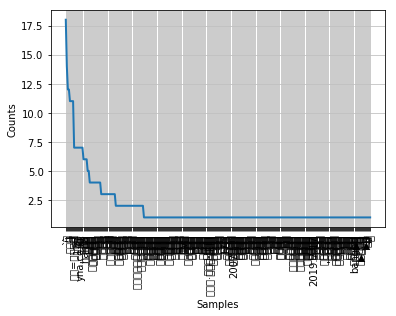

In [72]:
text.plot()

## Empirical Law
- 수많은 코퍼스를 다루다 보니 나온 경험적 법칙
- 구두점과 쓸모 없지만 많이 나오는 것이 많다. 
    - 엔트로피가 높다. -> 제거해야한다.
- 특정한 법칙을 찾았다. : Zipf's Law

### Zipf's Law
- 기울기가 급격하게 감소하여 수렴하는 그래프가 나온다.
- 자기 순위에 반비례 -> 비율로 찾을 수 있다.
- 여기에 맞는다면 bias가 적다.
- 이 법칙을 따르면 valenced가 맞는다고 얘기 할 수 있다.

빈도는 문서의 길이에 따라 달라지므로 빈도를 기준으로 의미있는 데이터를 골라낼 수 없다
- 순위와 비율로 자른다.
    - 최대 빈도로 정규화를 시켜서 1이내의 스케일로 만들어줘서 잘라줄 수 있다.
- 상위 20%, 하위 20% 정도 날리고 시작하거나 TOP k개를 버리고 시작한다.

freq() 함수를 쓰면 비율이 나온다.

In [11]:
text.vocab().freq("정두언")

0.01981981981981982

상위 10개의 단어가 20%를 차지하고 있다

In [28]:
ratio = 0.0
# 빈도가 높은 10개를 뽑아 그 중에 값을 뽑아 반복
for _ in [_[0] for _ in text.vocab().most_common(10)]:
    # 그 값의 비율을 찾아서 ratio에 더한다.
    ratio += text.vocab().freq(_)
    print(text.vocab().freq(_))
print(ratio)
# 20% 정도를 빈도top10이 차지하고 있다.

0.032432432432432434
0.025225225225225224
0.021621621621621623
0.021621621621621623
0.01981981981981982
0.01981981981981982
0.01981981981981982
0.01981981981981982
0.012612612612612612
0.012612612612612612
0.2054054054054054


빨간 라인이 파란 라인에 근접해야 법칙에 맞는 것
- 문서 양을 늘리면 더 근접해질 것.
- 로그를 뒤집어 놓는 것과 유사 -> 로그를 씌우면 선형 비슷해진다.

중요 구성성분임에도 다음처럼 전처리를 하게 되면 날라가기 때문에 문장이 깨진다.
- context가 중요한 text에서는 다음과 같이 날리면 중요한 것이 날라가게 된다.

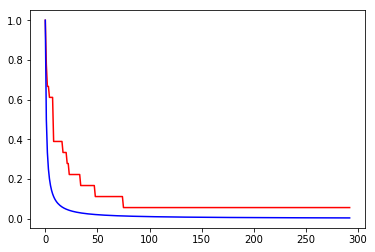

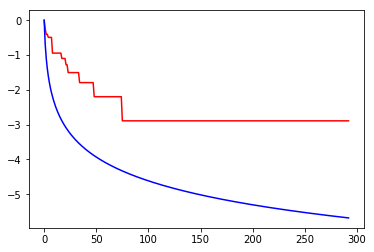

In [13]:
import matplotlib.pyplot as plt
from math import log
# text.vocab().items()를 람다식의 반환값들(빈도)을 비교하여 토큰들을 내림차순으로 정렬한 리스트 
token = [_[0] for _ in 
         sorted(text.vocab().items(), 
                key=lambda x:x[1], reverse=True)]
# text.vocab().items()를 람다식의 반환값들(빈도)을 비교하여 내림차순으로 정렬하고 비율(빈도/가장 높은 빈도)을 구한 리스트
freq = [_[1]/text.vocab().most_common(1)[0][1] 
        for _ in sorted(text.vocab().items(), 
                        key=lambda x:x[1], reverse=True)]
_freq = [log(_) for _ in freq]
rank = [1/(_+1) for _ in range(len(token))]
_rank = [log(_) for _ in rank]
plt.plot([i for i in range(len(token))], freq, "r-")
plt.plot([i for i in range(len(token))], rank, "b-")
plt.show()
plt.plot([i for i in range(len(token))], _freq, "r-")
plt.plot([i for i in range(len(token))], _rank, "b-")
plt.show()

##### 뉴스 기사 모은 것 다 더해서 그래프 그려보기

내 코드

In [93]:
news = ""
for _ in corpus:
    news += " "+_
text = Text(word_tokenize(news))
print(text)
len(text)

<Text: `` 합리적 보수 주춧돌 되길 바랐는데 '' 줄지어...>


16571

선생님 코드

In [14]:
largeText = "\n".join(corpus)
text = Text(word_tokenize(largeText))

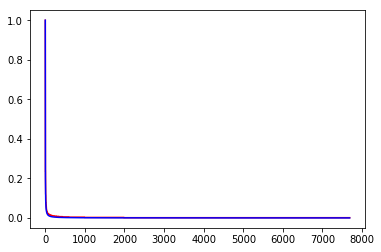

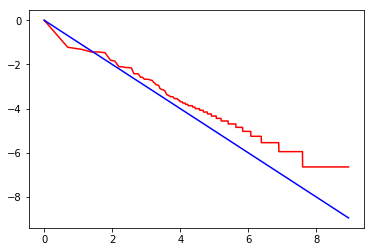

In [15]:
import matplotlib.pyplot as plt
from math import log
token = [_[0] for _ in 
         sorted(text.vocab().items(), 
                key=lambda x:x[1], reverse=True)]
freq = [_[1]/text.vocab().most_common(1)[0][1] 
        for _ in sorted(text.vocab().items(), 
                        key=lambda x:x[1], reverse=True)]
_freq = [log(_) for _ in freq]
rank = [1/(_+1) for _ in range(len(token))]
_rank = [log(_) for _ in rank]
plt.plot([i for i in range(len(token))], freq, "r-")
plt.plot([i for i in range(len(token))], rank, "b-")
plt.show()
plt.plot([log(i+1) for i in range(len(token))], _freq, "r-")
plt.plot([log(i+1) for i in range(len(token))], _rank, "b-")
plt.show()

직선형 그래프
- 언어에 관계없이 법칙이 작용함을 알 수 있다.

### Heaps' Law
- 말뭉치가 있다 하더라도 feature로서 demeinsion을 삼는것은 줄어든다.
- 잘라내고 유니크한 단어 수를 알 수 있으니 디멘젼을 얼마나 사용해야하는지 안다.

In [29]:
K = 10#10 ~ 100
B = 0.4#0.4 ~ 0.6
unique = list()
total = list()
heaps = list()
largeText = ""
for _ in corpus:
    largeText += " "+_
    text = Text(word_tokenize(largeText))
    unique.append(text.vocab().B())
    total.append(text.vocab().N())
    heaps.append(K*text.vocab().N()**B)


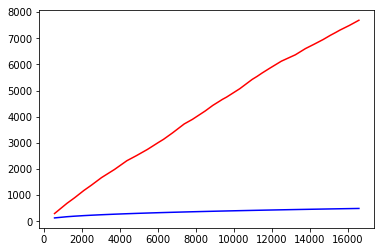

In [30]:
# plt.plot(x축, y축, 색)
plt.plot(total, unique, "r-")
plt.plot(total, heaps, "b-")
plt.show()

위의 그래프에서 두 선이 일치하지는 않지만 경향성이 비슷한 것을 알 수 있다.
- 단어가 무한정 늘어난다고 디멘젼이 무한정 늘어나는 것이 아니다.

경험적인 법칙에 맞지 않으면 정보 양이 충분하지 않은 것이다.

### n-gram
- 언어학적인 지식 없이 빈도와 통계적인 것으로 할 수 있는 방법
- feature가 많이 생긴다는 단점이 있다.
- 어간이라는 것들을 찾기 좋은 접근중 하나이다.
- 단어라고 하는 것들에서 나오는 시퀀스를 어떻게 찾을지
- 확률을 통해 다음 글자를 찾을 수 있다.
- 앞에 있는 단어의 조합을 보고 다음에 누가 올 지를 조건부 확률을 통해 예측할 수 있다.
- 내 이전의 단어를 n개까지 보겠다 -> n-gram모델
- 실제로는 사용할 수 없다. -> 패턴이 나올 수 있는 가지수가 많다 -> 빈도가 적다. -> 0에 수렴한다.
- 그럼에도 불구하고 특정 부분에서 사용된다 색인 방법으로 사용
- 충분한 양의 데이터가 수집이 되어야한다.

#### corpus
- 밸런스드가 맞춰져야한다.
- 다양한 언어 패턴에 대한 정보가 모여있어야한다.
- 굉장히 골고루 분야별로 모아야한다.(직업, 성별 나이 등등에 따라 사용하는 언어 정보)

#### 한글 엔그램
- 어절을 이용하여 사용할 수 있다.


In [ ]:
sentence = "Life is too short, You need Python"
N=2
Python?
P(Python|need, You, short, too, is, Life)
P(Python|need)
P(need|Your)
N=3
P(Python|need,You)
P(need|You) P(Python|need) # 쭉 이어지는 구조
# 패턴만 잘 정해 놓으면 찾아갈 수 있다.
# 어절 단위의 n-gram
#우리말
술 한잔 마셨습니다.
아버지가, 아버지를, 아버지께서, 아버지에게
-> 아버지 + 가 (어간 추출)
랭귀지를 이해하는 곳에서 많이 사용 
술한잔마셨습니다. -> 어디서 띄어 써야 했나: 띄어쓰기 규칙 적용
자동완성 추천에도 사용

n-gram 모델 만들기

In [31]:
sentence = "Life is too short, You need Python"

def eojeol(sentence, N=2):
    tokens = word_tokenize(sentence)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
#         ngram.append(" ".join(tokens[i:i+N]))
        ngram.append(tuple(tokens[i:i+N]))
    return ngram

# eojeol(sentence)
eojeol(sentence, 3)

[('Life', 'is', 'too'),
 ('is', 'too', 'short'),
 ('too', 'short', ','),
 ('short', ',', 'You'),
 (',', 'You', 'need'),
 ('You', 'need', 'Python')]

많이 나온 쌍  찾기

In [32]:
# defaultdict 값이 없으면 디폴트값을 주는 딕셔너리 -> int면 0, float면 0.0 등등...
from collections import defaultdict

freq = defaultdict(int)
# 어절의 빈도를 계산
for _ in eojeol(corpus[0]):
    freq[_] += 1

In [34]:
# 빈도 계산한 것을 빈도 기준으로 내림차순해서 상위 10개 
sorted(freq.items(), key=lambda x:x[1], reverse=True)[:10]

[(('(', '서울=연합뉴스'), 7),
 (('서울=연합뉴스', ')'), 7),
 (('기자', '='), 7),
 (('@', 'yna.co.kr'), 7),
 ((')', '신준희'), 6),
 (('신준희', '기자'), 6),
 (('정두언', '전'), 6),
 (('있다', '.'), 6),
 (('hama', '@'), 6),
 (('고', '정두언'), 5)]

P(")") ?
P(")"|"서울=연합뉴스")
P("서울=연합뉴스"|"(")
P("(")

In [118]:
freq[('(', '서울=연합뉴스')]/sum(freq.values()) * freq[('서울=연합뉴스',')')]/freq[('(', '서울=연합뉴스')]

0.01263537906137184

In [120]:
[_ for _ in freq if _[1] == ")"]

[('서울=연합뉴스', ')'), ('故', ')'), ('오른쪽', ')'), ('서울=연합뉴수', ')')]

음절 단위(소리 나는 단위)

In [35]:
def umjeol(token, N=2):
    tokens = list(token)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        ngram.append("".join(tokens[i:i+N]))
#         ngram.append(tuple(tokens[i:i+N]))
    return ngram
# umjeol(sentence)
umjeol(corpus[0].splitlines()[0])
# len(umjeol(corpus[0])) # 쌍이 늘어난다.

['"합',
 '합리',
 '리적',
 '적 ',
 ' 보',
 '보수',
 '수 ',
 ' 주',
 '주춧',
 '춧돌',
 '돌 ',
 ' 되',
 '되길',
 '길 ',
 ' 바',
 '바랐',
 '랐는',
 '는데',
 '데"',
 '" ',
 ' 줄',
 '줄지',
 '지어',
 '어 ',
 ' 추',
 '추모']

### WPM (Word Piece Model)
- 하나 단어를 내부 단어들로 분리하는 단어 분리 모델
- 어간이라는 공통된 부분을 줄이면 머신이 똑똑해지지 않을까?
- 바이트페어인코딩(Byte Pair Encoding)(Digram Coding)
    - 어간 추출을 만들 수 있다.

어간 추출에 BPE가 어떻게 도는지 확인

In [126]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\재은\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [36]:
from nltk.corpus import stopwords
print(stopwords.open("english").read())

i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't



빈도를 이용해서 누가 합쳐져야하는지 누가 분리되어야 하는지를 이용하여 stemming한 결과로 사용할 수 있다.
- 쌍의 빈도가 높다 -> 붙어있을 가능성이 높다(sequence일 가능성이 높다)
- 쌍의 빈도가 낮다 -> 어미일 가능성이 높다 or 떨어져 있을 가능성이 높다

### Normalization
- 불용어 처리 과정

BPE
- </w> 단어의 끝을 알려준다.
- 돌리면 양질의 데이터를 만들 수 있다.
- 뉴스 모아 놓은걸로 해보기


In [45]:
import re

In [73]:
tokens = {
    "l o w </w>" : 5,
    "l o w e s t </w>" : 2,
    "n e w e r </w>" : 6,
    "w i d e r </w>" : 3
}

In [71]:
tokens = {
    "아 버 지 가 </w>" : 5,
    "아 버 지 께 서 </w>" : 2,
    "아 버 지 를 </w>" : 6,
    "아 버 지 에 게 </w>" : 3
}

In [78]:
tokens = defaultdict(int)
text = Text(word_tokenize(corpus[1]))
text.vocab().items()
for token, freq in text.vocab().items():
    tokens[" ".join(token)+" </w>"] = freq


In [79]:
K = max(tokens.values())
for _ in range(100):
    maxKey = findBigram(tokens)
    tokens = mergeMaxKey(maxKey, tokens, K)

# pattern = r"[A-Za-z\/\<\>]{2,}"
pattern = r"[가-힣A-Za-z\/\<\>]{2,}"
result = list()
for _ in tokens:
    result.extend([_ for _ in re.findall(pattern, _) if _ != "</w>"])
set(result)

{'고</w>', '는</w>', '다</w>', '을</w>'}

In [42]:
def findBigram(tokens):
    ngram = defaultdict(int)
    for token, freq in tokens.items():
        syllables = token.split()
        for i in range(len(syllables)-1):
            ngram[tuple(syllables[i:i+2])] += freq
    return ngram

In [226]:
[ngram.get(_) for _ in ngram]

[5, 2, 2, 2, 2, 6, 6, 6, 3, 3, 3]

In [227]:
max(ngram, key=lambda x:x[1])

('e', 'w')

In [233]:
test = [_[1] for _ in ngram]
print(test)

['</w>', 'e', 's', 't', '</w>', 'e', 'w', 'er</w>', 'i', 'd', 'er</w>']


In [231]:
max(test)

'w'

In [43]:
def mergeMaxKey(ngram, tokens, K):
    maxKey = max(ngram, key = ngram.get)
    maxValue = max(ngram.values())
    newTokens = dict()
    for token, freq in tokens.items():
        newTokens[re.sub(" ".join(maxKey), "".join(maxKey), token) if maxValue > K else token] = freq
#     print(maxKey)
    return newTokens

In [198]:
tokens = newTokens

In [178]:
newTokens#, maxKey

{'low </w>': 5, 'low e s t </w>': 2, 'ne w er</w>': 6, 'w i d er</w>': 3}

어간이라고 부를 수 있는 패턴들

In [202]:
pattern = r"[A-Za-z\/\<\>]{2,}"
result = list()
for _ in tokens:
    result.extend([_ for _ in re.findall(pattern, _) if _ != "</w>"])
set(result)

{'er</w>', 'low', 'new'}